<a href="https://colab.research.google.com/github/Aayush360/data_science/blob/master/pandas_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: using pandas for sales data analysis

In [0]:
#import the dependencies
import pandas as pd
import os

In [3]:
#using google colab to upload the file
from google.colab import files
uploaded = files.upload()

Saving Sales_April_2019.csv to Sales_April_2019.csv
Saving Sales_August_2019.csv to Sales_August_2019.csv
Saving Sales_December_2019.csv to Sales_December_2019.csv
Saving Sales_February_2019.csv to Sales_February_2019.csv
Saving Sales_January_2019.csv to Sales_January_2019.csv
Saving Sales_July_2019.csv to Sales_July_2019.csv
Saving Sales_June_2019.csv to Sales_June_2019.csv
Saving Sales_March_2019.csv to Sales_March_2019.csv
Saving Sales_May_2019.csv to Sales_May_2019.csv
Saving Sales_November_2019.csv to Sales_November_2019.csv
Saving Sales_October_2019.csv to Sales_October_2019.csv
Saving Sales_September_2019.csv to Sales_September_2019.csv


In [0]:
#reading the first file

df1 = pd.read_csv('Sales_January_2019.csv')
df1 = pd.DataFrame(df1)
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [0]:
#merging 12 months of sales data into a single file


files = [files for files in os.listdir('/content/datas')]

#create an empty DataFrame

all_month = pd.DataFrame()


for file in files:
  df = pd.read_csv('/content/datas/'+file)
  all_month = pd.concat([all_month,df])

all_month.to_csv("first_combo.csv", index=False)

  

In [5]:
#read the updated dataframe

all_data = pd.read_csv('first_combo.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [6]:
#see the shape of the data

all_data.shape

(186850, 6)

In [7]:
#cleaning the data to remove the NaN 

all_data.isna().sum()

#get the nan rows

all_nan_data = all_data[all_data.isna().any(axis=1)]
all_nan_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1047,NaN,NaN,NaN,NaN,NaN,NaN
1542,NaN,NaN,NaN,NaN,NaN,NaN
1653,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2043,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#drop the nan values 

all_data=all_data.dropna(axis=0)
all_data.shape

(186305, 6)

In [9]:
#augment the data with additional columns
#first add month column in the data

all_data['Months'] = all_data['Order Date'].str[0:2]
all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [10]:
#removing the month column having value as 'Or' string

all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [11]:
#convert the string type data in months columns into integer number

all_data['Months'] =all_data['Months'].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3


In [0]:
#convert columns to the correct type

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #converting to integer
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #converting to float


In [13]:
all_data['sales'] = all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99


In [0]:
City = pd.DataFrame()
City =all_data['Purchase Address'].str.split(',')



In [0]:
#we can also define a function that would give us the address 

def get_add(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

In [16]:
#add a city column
#apply pandas apply method

#use lambda to grab the cell content

all_data['city'] =all_data['Purchase Address'].apply(lambda x:f" {x.split(',')[1]}({get_state(x)})") #or we can call get_add(x) method from above
all_data.head()




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales,city
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin(TX)
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin(TX)
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin(TX)
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco(CA)
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco(CA)


In [0]:
#use groupby method to add up the values in the sales columns
result = all_data.groupby('Months').sum()

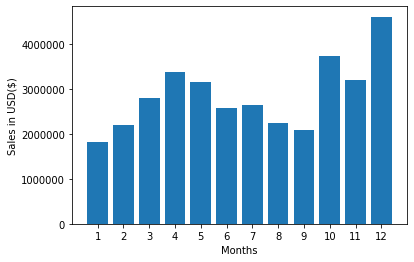

In [18]:
#for visualization

import matplotlib.pyplot as plt

months=range(1,13) #contains value from 1 to 12
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD($)')
plt.bar(months,result['sales'])
plt.show()

In [19]:
 #which US city had the highest number of sales?

result2 = all_data.groupby('city').sum()
result2


,Quantity Ordered,Price Each,Months,sales
city,,,,
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Austin(TX),11153,1.809874e+06,69829,1.819582e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06
New York City(NY),27932,4.635371e+06,175741,4.664317e+06
Portland(ME),2750,4.471893e+05,17144,4.497583e+05
Portland(OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco(CA),50239,8.211462e+06,315520,8.262204e+06


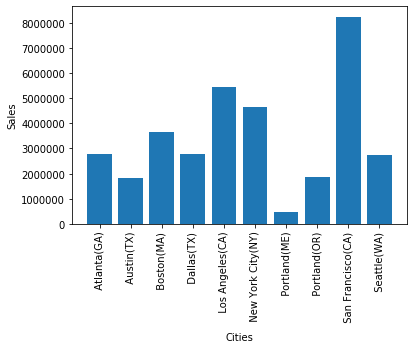

In [20]:
#for visualization
import matplotlib.pyplot as plt

cities = [city for city,df in all_data.groupby('city')]
plt.bar(cities,result2['sales'])
plt.xticks(cities,rotation=90)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.show()

In [0]:
#what time should we display the advertisement to get maximum likelihood of the customer to buy the product

In [23]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales,city
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin(TX)
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin(TX)
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin(TX)
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco(CA)
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco(CA)


In [25]:
#grab the hour and minute value from Order Date columns

all_data['hour'] = all_data['Order Date'].dt.hour
all_data['minute'] =all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales,city,hour,minute
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin(TX),20,59
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin(TX),20,59
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin(TX),20,59
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco(CA),5,39
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco(CA),0,1


In [0]:
all_data['time_h'] =pd.to_numeric(all_data['hour'])
all_data['time_m']= pd.to_numeric(all_data['minute'])

In [28]:
all_data['time_total']= all_data['time_h']+(all_data['time_m']/60)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales,city,hour,minute,time_h,time_m,time_total
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin(TX),20,59,20,59,20.983333
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin(TX),20,59,20,59,20.983333
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin(TX),20,59,20,59,20.983333
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco(CA),5,39,5,39,5.650000
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco(CA),0,1,0,1,0.016667


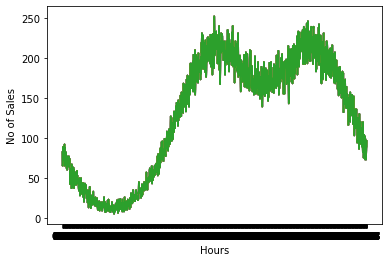

In [34]:
#data visualization for time column and sales value using matplotlib

hour = [hour for hour,df in all_data.groupby('time_total')]
plt.plot(hour, all_data.groupby(['time_total']).count())
plt.xticks(hour)
plt.xlabel('Hours')
plt.ylabel('No of Sales')
plt.show()

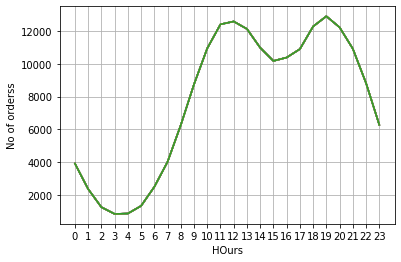

In [38]:
#to get more discrete verision of the graph by taking only the hours columns

hours =[hours for hours,df in all_data.groupby('hour')]
plt.plot(hours, all_data.groupby(['hour']).count() )
plt.xticks(hours)
plt.grid()
plt.xlabel('HOurs')
plt.ylabel('No of orderss')
plt.show()

In [39]:
#what products are most often sold together?

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,sales,city,hour,minute,time_h,time_m,time_total
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin(TX),20,59,20,59,20.983333
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin(TX),20,59,20,59,20.983333
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin(TX),20,59,20,59,20.983333
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco(CA),5,39,5,39,5.650000
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco(CA),0,1,0,1,0.016667


In [46]:
#first filter the duplicate rows to retain themn in the new dataframe

df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] =df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#get rid the duplicates pairs of groups

df =df[['Order ID','Grouped']].drop_duplicates()
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"


In [47]:
#count the pairs to what occurs the most frequently

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
  print(key,value)



('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [0]:
#what product sold the most? why do you it sold the most?

temp =all_data



In [69]:
prod_group = temp.groupby('Product')

df_prod = temp.groupby('Product').sum()
#df_prod = df_prod.sort_values(['Quantity Ordered'],ascending=False)
df_prod.head()

,Quantity Ordered,Price Each,Months,sales,hour,minute,time_h,time_m,time_total
Product,,,,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252,58764,122252,60801.533333
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331,90916,184331,93988.183333
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948,107540,219948,111205.800000
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,89076,183480,92134.000000
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039,298342,609039,308492.650000


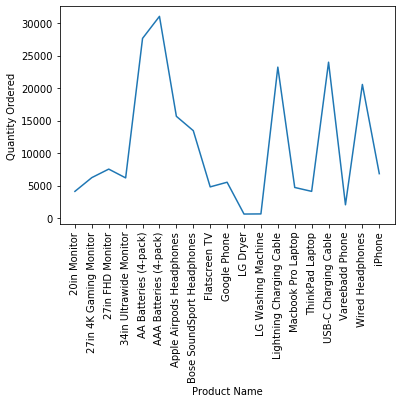

In [72]:
#data visualization using the bar graph

quantity_ord = prod_group.sum()['Quantity Ordered']
product = [product for product,df in prod_group]

plt.plot(product, quantity_ord)
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')
plt.show()




In [73]:
#finding the correlation between the sales and price_each of the product

price = temp.groupby('Product').mean()['Price Each']
price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

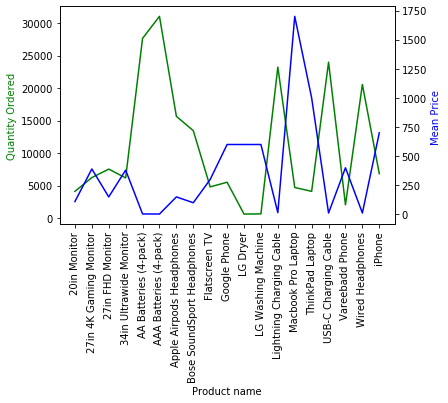

In [81]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(product,quantity_ord , 'g-')
ax2.plot(product, price, 'b-')
ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Mean Price ', color='b')
ax1.set_xticklabels(product, rotation='vertical')


plt.show()